 # Portfolio Choice with Risky Housing

In [1]:
# This cell does some preliminary set up

# Packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# This is a jupytext paired notebook that autogenerates BufferStockTheory.py
# which can be executed from a terminal command line via "ipython BufferStockTheory.py"
# But a terminal does not permit inline figures, so we need to test jupyter vs terminal
# Google "how can I check if code is executed in the ipython notebook"
from IPython import get_ipython  # In case it was run from python instead of ipython

# Import relevenat HARK tools
from ConsPortfolioHousingModel import PortfolioRentalHousingType


# If the ipython process contains 'terminal' assume not in a notebook
def in_ipynb():
    try:
        if "terminal" in str(type(get_ipython())):
            return False
        else:
            return True
    except NameError:
        return False


# Determine whether to make the figures inline (for spyder or jupyter)
# vs whatever is the automatic setting that will apply if run from the terminal
if in_ipynb():
    # %matplotlib inline generates a syntax error when run from the shell
    # so do this instead
    get_ipython().run_line_magic("matplotlib", "inline")
else:
    get_ipython().run_line_magic("matplotlib", "auto")

### The base model

\begin{equation}
	\begin{gathered}
		v^R_{t}(m_{t}) =  \max_{x_{t}, \varphi_{t}}u(x_t) + \beta \mathbb{E} \Gamma_{t+1}^{1-\rho} v^R_{t+1}(m_{t+1}) \\
		\text{s.t.} \quad a_t = m_t - x_t, \quad x_t, a_t \ge 0 \\
		c_t = (1-\alpha) x_t, \quad h_t = \alpha x_t \\
		m_{t+1} = \theta_{t+1} + a_t(\varphi_t R_{t+1} + (1-\varphi_t)R_f)/\Gamma_{t+1}
	\end{gathered}
\end{equation}

### Calibration

We replicate the previously defined parameter values and transition processes for state variables and shocks, and format them into the structures required by HARK.

This is done in the external file [Calibration/params.py](https://github.com/matthew-zahn/CGMPort/blob/master/CGMPort-Shared/Code/Python/Calibration/params.py), which we now import.

In [2]:
# Calibrate the model in line with the information above
import sys, os

# The following code navigates to another directory where a python script with the parameters for the model is saved.
sys.path.append(os.path.realpath("Calibration/"))
# Loading the parameters from the Calibration/params.py script
from params import dict_portfolio, time_params, det_income, age_plot_params

All of the model's parameters are contained in the structure <tt>dict_portfolio<tt>, which can now be passed to HARK's <tt>PortfolioConsumerType<tt> to build and solve a representation of our problem.  

In [3]:
# add RntHseShare to model, assuming households spend 30%
# of expenditures on rental housing
dict_portfolio["RntHseShare"] = 0.30

from ConsPortfolioHousingModel import init_portfolio_housing
init_portfolio_housing["RntHseShare"] = 0.30
# Solve the model with the given parameters
agent = PortfolioRentalHousingType(**init_portfolio_housing)
agent.solve()

In [4]:
# Define a normalization factor
norm_factor = det_income * np.exp(0)

### Key Results

#### The optimal risky asset share

The plot below shows the policy function for the risky portfolio share as a function of wealth at different ages.

The optimal risky share is decreasing in wealth. The authors argue this is due to the fact that, at low levels of wealth, relatively safe human wealth represents a higher fraction of the consumer's wealth, so he shifts his tradeable wealth towards riskier alternatives.

Analyzing the policy rule by age also shows that the risky share increases from young to middle age, and decreases from middle to old age. This is consistent with the previous interpretation: shares trace the humped shape of labor earnings.

These estimates are different from what is produced in the original paper, which are also reproduced below. Generally, the policy functions do not share the same curvature, which leads to greater reductions in the optimal portfolio share at lower levels of wealth.

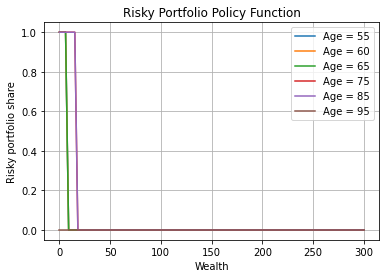

In [5]:
# Plot portfolio rule
eevalgrid = np.linspace(0, 300, 100)
plt.figure()
# In the last period of life you consume everything
# so portfolio choice is irrelevant

# Ages
ages = age_plot_params
age_born = time_params["Age_born"]
for a in ages:
    plt.plot(
        eevalgrid,
        agent.solution[a - age_born].ShareFuncAdj(
            eevalgrid / norm_factor[a - age_born]
        ),
        label="Age = %i" % (a * 5 + 25),
    )
plt.xlabel("Wealth")
plt.ylabel("Risky portfolio share")
plt.title("Risky Portfolio Policy Function")
plt.legend()
plt.grid()

if not in_ipynb():
    plt.show(block=False)
    plt.pause(1)
else:
    plt.show(block=True)

We present the author's originally reported policy functions for comparison
<center><img src="Figures\Opt_shares_by_age.jpg" style="height:300px"></center>

#### Consumption behavior

The plot below shows the policy functions for consumption, rental housing, and total expenditures as a function of wealth at different ages.

At all age levels consumption increases with wealth. The consumption function also appears to shift upwards as life progresses.

Our consumption policy functions again do not match those of the original paper, which are also reproduced below. Consumption also appears to increase with age in our policy functions that does not come through in the results presented in the paper. 

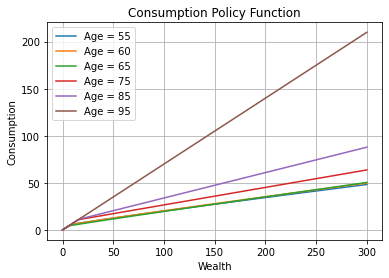

In [6]:
# Plot consumption function
plt.figure()
ages = age_plot_params
for a in ages:
    plt.plot(
        eevalgrid,
        agent.solution[a - age_born].cFuncAdj(eevalgrid / norm_factor[a - age_born])
        * norm_factor[a - age_born],
        label="Age = %i" % (a * 5 + 25),
    )
plt.xlabel("Wealth")
plt.ylabel("Consumption")
plt.title("Consumption Policy Function")
plt.legend()
plt.grid()

if not in_ipynb():
    plt.show(block=False)
    plt.pause(1)
else:
    plt.show(block=True)

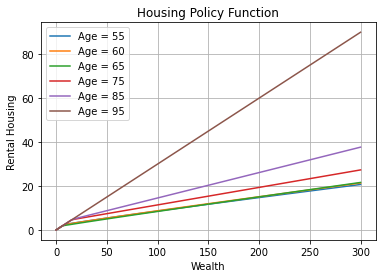

In [7]:
# Plot rental housing function
plt.figure()
ages = age_plot_params
for a in ages:
    plt.plot(
        eevalgrid,
        agent.solution[a - age_born].hFuncAdj(eevalgrid / norm_factor[a - age_born])
        * norm_factor[a - age_born],
        label="Age = %i" % (a * 5 + 25),
    )
plt.xlabel("Wealth")
plt.ylabel("Rental Housing")
plt.title("Housing Policy Function")
plt.legend()
plt.grid()

if not in_ipynb():
    plt.show(block=False)
    plt.pause(1)
else:
    plt.show(block=True)

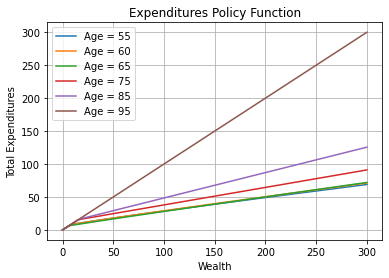

In [8]:
# Plot total expenditures function
plt.figure()
ages = age_plot_params
for a in ages:
    plt.plot(
        eevalgrid,
        agent.solution[a - age_born].TotalExpAdj(eevalgrid / norm_factor[a - age_born])
        * norm_factor[a - age_born],
        label="Age = %i" % (a * 5 + 25),
    )
plt.xlabel("Wealth")
plt.ylabel("Total Expenditures")
plt.title("Expenditures Policy Function")
plt.legend()
plt.grid()

if not in_ipynb():
    plt.show(block=False)
    plt.pause(1)
else:
    plt.show(block=True)

We again present the author's originally reported policy functions for comparison
<center><img src="Figures\Opt_cons_by_age.jpg" style="height:300px"></center>

### Simulations

Using the policy functions obtained from solving the model we present a series of simulations to highlight features of the model.

We first run a few simulations to verify the quality of our calibration.

The figures below show simulated levels of permanent income and risky portfolio shares for 5 agents over their life spans. We can see the model generates a heterogeneous permanent income distribution. Interestingly, all of these agents tend to follow the same general pattern for investing in the risky asset. Early in life, all of their portfolios are invested in the risky asset. This declines as the agent ages and converges to approximately 35% once they reach retirement.

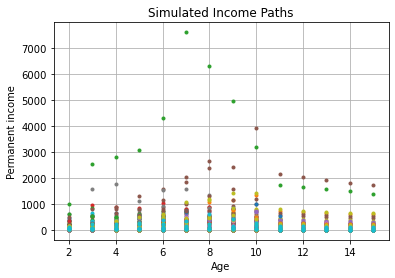

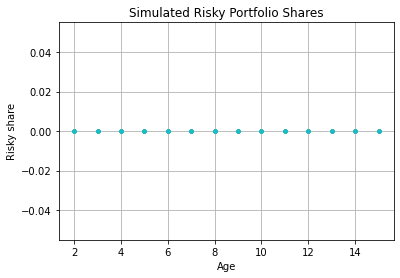

In [9]:
# Set up simulation parameters

# Number of agents and periods in the simulation.
agent.AgentCount = 50  # Number of instances of the class to be simulated.
# Since agents can die, they are replaced by a new agent whenever they do.

# Number of periods to be simulated
agent.T_sim = 80

# Set up the variables we want to keep track of.
agent.track_vars = ["aNrm", "cNrm", "pLvl", "t_age", "Share", "mNrm"]

# Run the simulations
agent.initialize_sim()
agent.simulate()

# Present diagnostic plots.
plt.figure()
plt.plot(agent.history["t_age"] + time_params["Age_born"], agent.history["pLvl"], ".")
plt.xlabel("Age")
plt.ylabel("Permanent income")
plt.title("Simulated Income Paths")
plt.grid()

if not in_ipynb():
    plt.show(block=False)
    plt.pause(1)
else:
    plt.show(block=True)

plt.figure()
plt.plot(agent.history["t_age"] + time_params["Age_born"], agent.history["Share"], ".")
plt.xlabel("Age")
plt.ylabel("Risky share")
plt.title("Simulated Risky Portfolio Shares")
plt.grid()

if not in_ipynb():
    plt.show(block=False)
    plt.pause(1)
else:
    plt.show(block=True)

#### The average life cycle patterns

We now increase the number of simulations to examine and compare the behavior of the mean values of variables of interest at different ages, conditional on survival. In each case we present the original plots from the paper for reference.

The plot below illustrates the average dynamics of permanent income, consumption, and market resources across all of the simulated agents. The plot follows the general pattern observed in the original paper. However, our results show that the agents are accumulating significantly more market resources. 

In [10]:
# Number of agents and periods in the simulation.
agent.AgentCount = 50  # Number of instances of the class to be simulated.
# Since agents can die, they are replaced by a new agent whenever they do.

# Number of periods to be simulated
agent.T_sim = 15 * 50

# Run the simulations
agent.initialize_sim()
agent.simulate()

raw_data = {
    "Age": agent.history["t_age"].flatten() + time_params["Age_born"] - 1,
    "pIncome": agent.history["pLvl"].flatten(),
    "rShare": agent.history["Share"].flatten(),
    "nrmM": agent.history["mNrm"].flatten(),
    "nrmC": agent.history["cNrm"].flatten(),
}

Data = pd.DataFrame(raw_data)
Data["Cons"] = Data.nrmC * Data.pIncome
Data["M"] = Data.nrmM * Data.pIncome

# Find the mean of each variable at every age
AgeMeans = Data.groupby(["Age"]).mean().reset_index()

C:\Users\alujan\anaconda3\envs\PortfolioChoiceWithRiskyHousing-Latest\lib\site-packages\HARK\core.py:865: RuntimeWarning: invalid value encountered in add
  self.history[var_name] = np.empty((self.T_sim, self.AgentCount)) + np.nan


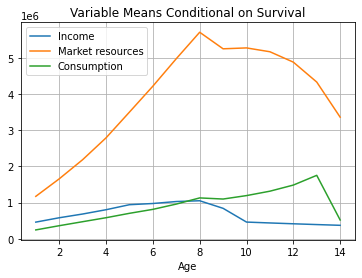

In [11]:
plt.figure()
plt.plot(AgeMeans.Age, AgeMeans.pIncome, label="Income")
plt.plot(AgeMeans.Age, AgeMeans.M, label="Market resources")
plt.plot(AgeMeans.Age, AgeMeans.Cons, label="Consumption")
plt.legend()
plt.xlabel("Age")
plt.title("Variable Means Conditional on Survival")
plt.grid()

if not in_ipynb():
    plt.show(block=False)
    plt.pause(1)
else:
    plt.show(block=True)

<center><img src="Figures\ConsWInc.jpg" style="height:300px"></center>

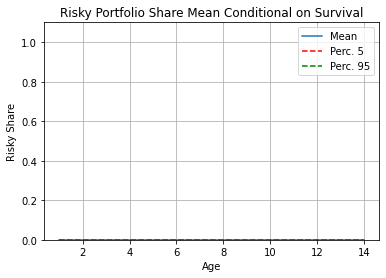

In [12]:
# Find age percentiles
AgePC5 = Data.groupby(["Age"]).quantile(0.05).reset_index()
AgePC95 = Data.groupby(["Age"]).quantile(0.95).reset_index()

# plot till death - 1
age_1 = time_params["Age_death"] - time_params["Age_born"]

plt.figure()
plt.ylim([0, 1.1])
plt.plot(AgeMeans.Age[:age_1], AgeMeans.rShare[:age_1], label="Mean")
plt.plot(AgePC5.Age[:age_1], AgePC5.rShare[:age_1], "--r", label="Perc. 5")
plt.plot(AgePC95.Age[:age_1], AgePC95.rShare[:age_1], "--g", label="Perc. 95")
plt.legend()

plt.xlabel("Age")
plt.ylabel("Risky Share")
plt.title("Risky Portfolio Share Mean Conditional on Survival")
plt.grid()

if not in_ipynb():
    plt.show(block=False)
    plt.pause(1)
else:
    plt.show(block=True)

<center><img src="Figures\ShareMeanSim.jpg" style="height:300px"></center>

In [13]:
ratio = (np.log(np.array(agent.RiskyAvg)) - np.log(agent.Rfree)) / (
            agent.CRRA * np.array(agent.RiskyStd) ** 2)
ratio = np.append(ratio, 0.0)

AgeMeans["nrmH"] = agent.hNrm
AgeMeans["RiskyAvg"] = agent.RiskyAvg + [0]
AgeMeans["RiskyStd"] = agent.RiskyStd + [0]
AgeMeans["Share"] = ratio * (1 + AgeMeans["nrmH"] / AgeMeans["nrmM"])
AgeMeans

TypeError: unsupported operand type(s) for +: 'float' and 'list'

In [ ]:
agent.RiskyStdTrue